<a href="https://colab.research.google.com/github/vybraaaxlyntaz207/Tugas-DataMining/blob/main/Tugas_Akhir_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [2]:
row_data = pd.read_csv('datalagu.csv')
row_data.shape

(1103, 9)

In [3]:
row_data.describe

<bound method NDFrame.describe of         No               Lagu             Artis       Genre  \
0        1    Some Song Title    Awesome Artist        Rock   
1        2        Catchy Tune         Cool Band         Pop   
2        3     Beats and Bass    Electro Master  Electronic   
3        4           Jazz Jam         Jazzy Joe        Jazz   
4        5      Country Roads       The Cowboys     Country   
...    ...                ...               ...         ...   
1098  1099    Underground Rap        Rap Rebels     Hip-hop   
1099  1100    Symphonic Metal  Metal Orchestral       Metal   
1100  1101      Island Groove      Island Vibes      Reggae   
1101  1102     Acoustic Bliss    Harmonious Duo    Acoustic   
1102  1103  Trance Expedition   Trance Voyagers      Trance   

      Kepekatan_Spektral  Kejernihan_Suara  Energi_Tonalitas  \
0                   0.75              0.85              0.65   
1                   0.60              0.90              0.80   
2                

In [4]:
data = row_data.dropna(axis=0)
data.describe()

,No,Kepekatan_Spektral,Kejernihan_Suara,Energi_Tonalitas,Keseragaman_Irama,Kecepatan_Tempo
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,552.000000,0.812330,0.821985,0.817090,0.828513,116.648232
std,318.552978,0.079798,0.074366,0.069646,0.059572,30.942947
min,1.000000,0.600000,0.650000,0.600000,0.650000,65.000000
25%,276.500000,0.750000,0.750000,0.800000,0.800000,90.000000
50%,552.000000,0.800000,0.850000,0.850000,0.850000,110.000000
75%,827.500000,0.900000,0.850000,0.850000,0.850000,140.000000
max,1103.000000,0.950000,0.950000,0.950000,0.950000,180.000000


In [5]:
  print (row_data.dtypes)

No                      int64
Lagu                   object
Artis                  object
Genre                  object
Kepekatan_Spektral    float64
Kejernihan_Suara      float64
Energi_Tonalitas      float64
Keseragaman_Irama     float64
Kecepatan_Tempo         int64
dtype: object


In [6]:
features = ['Kejernihan_Suara', 'Energi_Tonalitas', 'Keseragaman_Irama', 'Kecepatan_Tempo']
x = data[features]
y = data['Kepekatan_Spektral']
x.shape, y.shape

((1103, 4), (1103,))

In [7]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 70)

In [8]:
test_y.shape

(276,)

In [9]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model = KNN_Reg(n_neighbors = 80)

# training the model:
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)

 MSE:  0.003937368376358691 
 Accuracy:  0.37936448563683756


In [10]:
def Elbow(K):
  #initiating an empy list
  test_mse =[]

  #train model for every value of K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)

  return test_mse

Text(0.5, 1.0, 'Elbow Curve for Test')

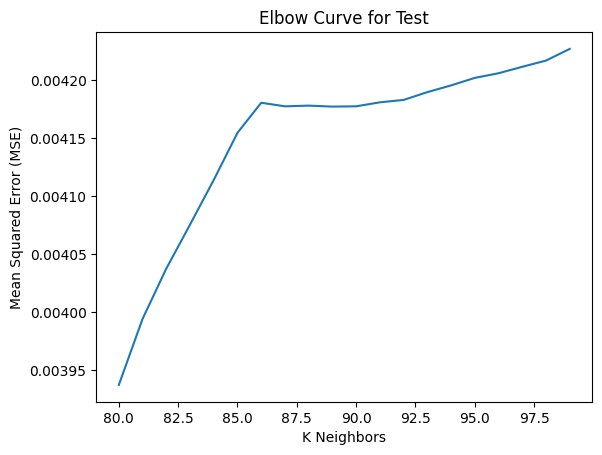

In [11]:
K = range(80, 100)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

In [57]:
new_model = KNN_Reg(n_neighbors=27)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n', 'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)

 Accuracy of new model (%): 92.40534273708332 
 Accuracy of old model (%): 37.936448563683754 
 Improvement (%): 54.46889417339956


In [73]:
datalagu = np.array([[0.15,0.35,0.20,0.70]])
prediction_old = model.predict(datalagu)
prediction_new = new_model.predict(datalagu)
print(' Hasil Prediksi Kecenderungan Gaya Musik Berdasarkan Analisis Spektral Audio yaitu', prediction_old , 'Hz \n',
      'Hasil Prediksi Kecenderungan Gaya Musik Berdasarkan Analisis Spektral Audio yaitu', prediction_new , 'Hz')

 Hasil Prediksi Kecenderungan Gaya Musik Berdasarkan Analisis Spektral Audio yaitu [0.85375] Hz 
 Hasil Prediksi Kecenderungan Gaya Musik Berdasarkan Analisis Spektral Audio yaitu [0.95] Hz


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [74]:
datalagu2 = np.array([[0.85,0.90,0.90,0.85]])
prediction_old = model.predict(datalagu2)
prediction_new = new_model.predict(datalagu2)
print(' Hasil Prediksi Kecenderungan Gaya Musik Berdasarkan Analisis Spektral Audio yaitu', prediction_old , 'Hz\n',
      'Hasil Prediksi Kecenderungan Gaya Musik Berdasarkan Analisis Spektral Audio yaitu', prediction_new , 'Hz')

 Hasil Prediksi Kecenderungan Gaya Musik Berdasarkan Analisis Spektral Audio yaitu [0.929375] Hz
 Hasil Prediksi Kecenderungan Gaya Musik Berdasarkan Analisis Spektral Audio yaitu [0.95] Hz


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [82]:
def hz_to_genre(hz_value):
    genre_mapping = {
        'Pop': (0, 0.1),
        'Electronic': (0.1, 0.2),
        'Jazz': (0.2, 0.3),
        'Country': (0.3, 0.4),
        'Hip-hop': (0.4, 0.5),
        'Classical': (0.5, 0.6),
        'Reggae': (0.6, 0.7),
        'Soul': (0.7, 0.8),
        'Experimental': (0.8, 0.9),
        'Funk': (0.9, 1.0),
        'EDM': (1.0, 1.1),
        'Drum and Bass': (1.1, 1.2),
        'Ballad': (1.2, 1.3),
        'Alternative': (1.3, 1.4),
        'Acoustic': (1.4, 1.5),
        'Heavy Metal': (1.5, 1.6),
        'Synthwave': (1.6, 1.7),
        'Reggaeton': (1.7, 1.8),
        'Blues': (1.8, 1.9),
        'Rockabilly': (1.9, 2.0),
        'Dance': (2.0, 2.1),
        'Trap': (2.1, 2.2),
        'Salsa': (2.2, 2.3),
        'Chillout': (2.3, 2.4),
        'Punk Rock': (2.4, 2.5),
        'Surf Rock': (2.5, 2.6),
        'Gospel': (2.6, 2.7),
        'Metalcore': (2.7, 2.8),
        'Indie Folk': (2.8, 2.9),
        'Techno': (2.9, 3.0),
        'Rock \'n\' Roll': (3.0, 3.1),
        'Dream Pop': (3.1, 3.2),
        'R&B': (3.2, 3.3),
        'World': (3.3, 3.4),
        'Psychedelic': (3.4, 3.5),
        'Shred': (3.5, 3.6),
        'Chillhop': (3.6, 3.7),
        'Downtempo': (3.7, 3.8),
        'Metal': (3.8, 3.9),
        'Trance': (3.9, 4.0),
        'Indie Rock': (4.0, 4.1),
        'Jazz Funk': (4.1, 4.2),
        'Deep House': (4.2, 4.3),
        'Death Metal': (4.3, 4.4),
        'Electro Swing': (4.4, 4.5),
    }

    for genre, (min_hz, max_hz) in genre_mapping.items():
        if min_hz <= hz_value < max_hz:
            return genre

    return 'Genre tidak teridentifikasi'




In [84]:
prediction_old_hz = 0.85375
prediction_new_hz = 0.95

In [83]:

genre_old = hz_to_genre(prediction_old_hz)
genre_new = hz_to_genre(prediction_new_hz)


In [78]:
# Menampilkan hasil
print('Hasil Prediksi Kecenderungan Gaya Musik Berdasarkan Analisis Spektral Audio yaitu', genre_old)
print('Hasil Prediksi Kecenderungan Gaya Musik Berdasarkan Analisis Spektral Audio yaitu', genre_new)

Hasil Prediksi Kecenderungan Gaya Musik Berdasarkan Analisis Spektral Audio yaitu Experimental
Hasil Prediksi Kecenderungan Gaya Musik Berdasarkan Analisis Spektral Audio yaitu Funk
